In the case of monoester metabolites, two PMFs were calculated, both for the neutral (protonated) and charged (deprotonated) forms, and from them the weighted average was calculated which is used in the calculations of permeability. The weighted average for $\Delta G(z)$ is given by:
$$\Delta G(z) = \Delta G(z)_P\frac{e^{\frac{-\Delta G(z)_P}{RT}}}{Q(z)} + \Delta G(z)_{PH}\frac{e^{\frac{-\Delta G(z)_{PH}}{RT}}}{Q(z)}$$
where, $Q(z)$ is the sum of two states given by, $$Q(z) = e^{\frac{-\Delta G(z)_P}{RT}} + e^{\frac{-\Delta G(z)_{PH}}{RT}}$$
Here, $\Delta G(z)_P$ is the PMF of the charged (deprotonated) phthalate and $\Delta G(z)_{PH}$ is the PMF of the uncharged (protonated) phthalate calculated for every $z$.

In [33]:
# The weighted average of the PMF is already done and is saved in xvg files with small letter names like 
# mehp-mehph.xvg

In [34]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz, simps #Importing trapz, and simps module from scipy for numerical integration


In [35]:
pmf_mehp_mehph = pd.read_csv('mehp-mehph.xvg', header = None, delim_whitespace=True)

In [36]:
# Checking the few data from pmf_mep_meph # Note, there are no error bars in here
pmf_mehp_mehph

,0,1
0,0.005005,-4.781046
1,0.015014,-4.816288
2,0.025024,-4.848423
3,0.035033,-4.974581
4,0.045042,-5.115041
...,...,...
416,4.168918,0.053229
417,4.178927,-0.256834
418,4.188936,-0.286718
419,4.198946,-0.058169


In [37]:
# Extrapolating for the data at 0
df = pd.DataFrame({0: [0.000000], 1: -4.781046})
df = df.append(pmf_mehp_mehph)
df = df.reset_index(drop=True)

In [38]:
# Just making a copy to have same name as original
pmf_mehp_mehph = df.copy(deep=True)

In [39]:
pmf_mehp_mehph.head()

,0,1
0,0.000000,-4.781046
1,0.005005,-4.781046
2,0.015014,-4.816288
3,0.025024,-4.848423
4,0.035033,-4.974581


In [40]:
# We don't want the values of z distance above 4, so
pmf_mehp_mehph = pmf_mehp_mehph[pmf_mehp_mehph[0] <= 4.000000]

In [41]:
pmf_mehp_mehph.tail()

,0,1
396,3.958720,0.106669
397,3.968730,0.091611
398,3.978739,0.081302
399,3.988748,0.077020
400,3.998758,0.086647


In [42]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.998758
pmf_mehp_mehph = pmf_mehp_mehph.append({0: 4.000000, 1: 0.086647}, ignore_index = True)

In [43]:
pmf_mehp_mehph

,0,1
0,0.000000,-4.781046
1,0.005005,-4.781046
2,0.015014,-4.816288
3,0.025024,-4.848423
4,0.035033,-4.974581
...,...,...
397,3.968730,0.091611
398,3.978739,0.081302
399,3.988748,0.077020
400,3.998758,0.086647


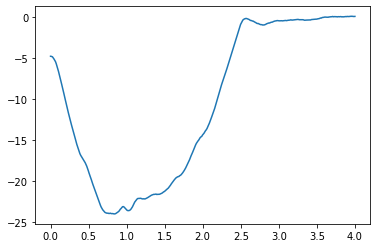

In [44]:
# Now, check a rough plot for free energy
plt.plot(pmf_mehp_mehph[0], pmf_mehp_mehph[1])

Now adding a $e^\frac{\Delta G}{RT}$ component in the last column of our PMF data. Here, $\Delta G$ is obtained from the second column pmf_mehp_mehph[1] and RT is 2.478 KJ/mol at 298K.

In [45]:
pmf_mehp_mehph[2] = np.exp(pmf_mehp_mehph[1]/2.478)

In [47]:
pmf_mehp_mehph

,0,1,2
0,0.000000,-4.781046,0.145236
1,0.005005,-4.781046,0.145236
2,0.015014,-4.816288,0.143185
3,0.025024,-4.848423,0.141340
4,0.035033,-4.974581,0.134324
...,...,...,...
397,3.968730,0.091611,1.037662
398,3.978739,0.081302,1.033354
399,3.988748,0.077020,1.031570
400,3.998758,0.086647,1.035585


In [48]:
# Just checking some values in the last column if it makes sense
np.exp(-4.781046/2.478)
# So, here the last column index 2 contains the values of the numerator of our integrand that we want to integrate

0.1452357355264546

In [49]:
np.exp(0.086647/2.478)

1.0355850215533353

### Weighted average of Diffusion coefficient for 2-ethylhexyl phthalate (MEHP)

Similarly for diffusion coefficient, the weighted average for $D(z)$ is given by:
$$D(z) = D(z)_P\frac{e^{\frac{-\Delta G(z)_P}{RT}}}{Q(z)} + D(z)_{PH}\frac{e^{\frac{-\Delta G(z)_{PH}}{RT}}}{Q(z)}$$
where, $Q(z)$ is the sum of two states given by, $$Q(z) = e^{\frac{-\Delta G(z)_P}{RT}} + e^{\frac{-\Delta G(z)_{PH}}{RT}}$$
Here, $\Delta G(z)_P$ is the PMF of the charged (deprotonated) phthalate and $\Delta G(z)_{PH}$ is the PMF of the uncharged (protonated) phthalate calculated for every $z$.

So, for the weighted average of Diffusion coefficient, we need the free energy of both the charged(deprotonated(P)) and uncharged (protonated(PH)) phthalate

In [50]:
# Here, the pmf for both charged and uncharged monoester metabolites are given by the xvg files with their usual names
# Like 5-MEHP.xvg, 5-MEHPH.xvg

In [51]:
pmf_mehp =  pd.read_csv('5-MEHP.xvg', header = None, delim_whitespace=True)

In [52]:
pmf_mehp.head()

,0,1
0,0.005005,24.18347
1,0.015014,24.05735
2,0.025024,23.77671
3,0.035033,23.34942
4,0.045042,22.87557


In [53]:
pmf_mehph =  pd.read_csv('5-MEHPH.xvg', header = None, delim_whitespace=True)

In [54]:
pmf_mehph.head()

,0,1
0,0.005006,-4.78129
1,0.015017,-4.81654
2,0.025028,-4.84870
3,0.035039,-4.97489
4,0.045050,-5.11539


In [55]:
# Extrapolating for the data at 0 for both
df = pd.DataFrame({0: [0.000000], 1: 24.18347})
df = df.append(pmf_mehp)
df = df.reset_index(drop=True)

In [56]:
# Just making a copy to have same name as original
pmf_mehp = df.copy(deep=True)

In [57]:
pmf_mehp.head()

,0,1
0,0.000000,24.18347
1,0.005005,24.18347
2,0.015014,24.05735
3,0.025024,23.77671
4,0.035033,23.34942


In [58]:
# We don't want the values of z distance above 4, so
pmf_mehp = pmf_mehp[pmf_mehp[0] <= 4.000000]

In [59]:
pmf_mehp.tail()

,0,1
396,3.958720,0.096774
397,3.968730,0.081822
398,3.978739,0.071655
399,3.988748,0.067265
400,3.998758,0.076853


In [60]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.998758
pmf_mehp = pmf_mehp.append({0: 4.000000, 1: 0.076853}, ignore_index = True)

In [61]:
pmf_mehp.tail()

,0,1
397,3.968730,0.081822
398,3.978739,0.071655
399,3.988748,0.067265
400,3.998758,0.076853
401,4.000000,0.076853


In [62]:
# Similarly for mehph,
# Extrapolating for the data at 0 for both
df = pd.DataFrame({0: [0.000000], 1: -4.78129})
df = df.append(pmf_mehph)
df = df.reset_index(drop=True)
# Just making a copy to have same name as original
pmf_mehph = df.copy(deep=True)

In [67]:
pmf_mehph.head()

,0,1
0,0.000000,-4.78129
1,0.005006,-4.78129
2,0.015017,-4.81654
3,0.025028,-4.84870
4,0.035039,-4.97489


In [68]:
# We don't want the values of z distance above 4, so
pmf_mehph = pmf_mehph[pmf_mehph[0] <= 4.000000]

In [71]:
pmf_mehph.tail()

,0,1
396,3.959378,18.797389
397,3.969389,18.813379
398,3.979400,18.844717
399,3.989411,18.808464
400,3.999422,18.806849


In [72]:
# Just extrapolating to have the same value in z = 4 nm as in z = 3.997334
pmf_mehph = pmf_mehph.append({0: 4.000000, 1: 18.806849}, ignore_index = True)

In [73]:
pmf_mehph

,0,1
0,0.000000,-4.781290
1,0.005006,-4.781290
2,0.015017,-4.816540
3,0.025028,-4.848700
4,0.035039,-4.974890
...,...,...
397,3.969389,18.813379
398,3.979400,18.844717
399,3.989411,18.808464
400,3.999422,18.806849


In [74]:
pmf_mehp

,0,1
0,0.000000,24.183470
1,0.005005,24.183470
2,0.015014,24.057350
3,0.025024,23.776710
4,0.035033,23.349420
...,...,...
397,3.968730,0.081822
398,3.978739,0.071655
399,3.988748,0.067265
400,3.998758,0.076853


In [75]:
pmf_mehp_mehph

,0,1,2
0,0.000000,-4.781046,0.145236
1,0.005005,-4.781046,0.145236
2,0.015014,-4.816288,0.143185
3,0.025024,-4.848423,0.141340
4,0.035033,-4.974581,0.134324
...,...,...,...
397,3.968730,0.091611,1.037662
398,3.978739,0.081302,1.033354
399,3.988748,0.077020,1.031570
400,3.998758,0.086647,1.035585


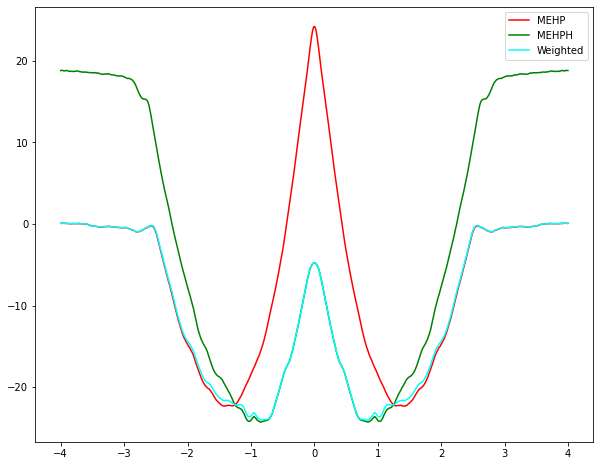

In [77]:
# Now, check a rough plot for free energy
plt.figure(figsize = (10,8))
plt.plot(pmf_mehp[0], pmf_mehp[1], color = 'r', label = 'MEHP')
plt.plot(-pmf_mehp[0], pmf_mehp[1], color = 'r')
plt.plot(pmf_mehph[0], pmf_mehph[1], color = 'g', label = 'MEHPH')
plt.plot(-pmf_mehph[0], pmf_mehph[1], color = 'g')
plt.plot(pmf_mehp_mehph[0], pmf_mehp_mehph[1], color = 'cyan', label = 'Weighted')
plt.plot(-pmf_mehp_mehph[0], pmf_mehp_mehph[1], color = 'cyan')

plt.legend()

In [78]:
diff_mehp = pd.read_csv('MEHP_dif.txt', header = None, delim_whitespace=True)
diff_mehph = pd.read_csv('MEHPH_dif.txt', header = None, delim_whitespace = True)

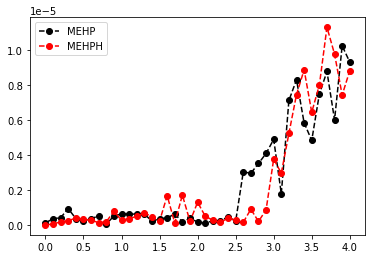

In [79]:
# Plotting both diffusion coefficients
plt.plot(diff_mehp[0], diff_mehp[1], '--o', color = 'k', label = 'MEHP')
plt.plot(diff_mehph[0], diff_mehph[1], '--o', color = 'r', label = 'MEHPH')
plt.legend()

Here, the linear interpolation is done for our diffusion coefficient so that we can obtain the missing values at the position specified by the PMF data. The function takes these values **np.interp(The z-coordinates at which to evaluate the interpolated values, The z-coordinates of the data points, The function values of these data points)**

In [85]:
any(pmf_mehp_mehph[0] == pmf_mehp[0]) # As the z distance of mehp, and the weighted average mehp_mehph is same, 
# we can interpolate on either of them

True

In [86]:
diff_mehp_inter = np.interp(pmf_mehp[0], diff_mehp[0], diff_mehp[1])
diff_mehph_inter = np.interp(pmf_mehp[0], diff_mehph[0], diff_mehph[1])

In [87]:
len(diff_mehp_inter)

402

In [88]:
len(diff_mehph_inter)

402

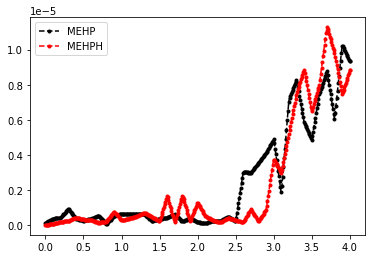

In [90]:
# Plot both to check the interpolated values if it makes sense or not
plt.plot(pmf_mehp[0], diff_mehp_inter, '--.', color = 'k', label = 'MEHP')
plt.plot(pmf_mehp[0], diff_mehph_inter, '--.', color = 'r', label = 'MEHPH')
plt.legend()
# It does with many data points

In [91]:
pmf_mehp_mehph[0].head()

0    0.000000
1    0.005005
2    0.015014
3    0.025024
4    0.035033
Name: 0, dtype: float64

In [92]:
pmf_mehp[0].head()

0    0.000000
1    0.005005
2    0.015014
3    0.025024
4    0.035033
Name: 0, dtype: float64

In [93]:
pmf_mehph[0].head()

0    0.000000
1    0.005006
2    0.015017
3    0.025028
4    0.035039
Name: 0, dtype: float64

So, since the z distance of pmf_meph is not same as of pme_mep, and weighted average(pme_mep_meph), we are now interpolating the value of pmf for meph at same z distance as that of mep and the weighted average. Let's make a new dataframe meph with interpolated values for pmf which we can use for our calculations

In [94]:
mehph = np.interp(pmf_mehp[0], pmf_mehph[0], pmf_mehph[1])

In [96]:
pmf_mehph[1]

0      -4.781290
1      -4.781290
2      -4.816540
3      -4.848700
4      -4.974890
         ...    
397    18.813379
398    18.844717
399    18.808464
400    18.806849
401    18.806849
Name: 1, Length: 402, dtype: float64

In [97]:
pd.Series(mehph)

0      -4.781290
1      -4.781290
2      -4.816531
3      -4.848687
4      -4.974817
         ...    
397    18.812326
398    18.842648
399    18.810865
400    18.806956
401    18.806849
Length: 402, dtype: float64

In [98]:
# As you can see, not much of difference between the original values pmf_mehph, and the interpolated ones mehph
# We can make a plot for both and check if we want

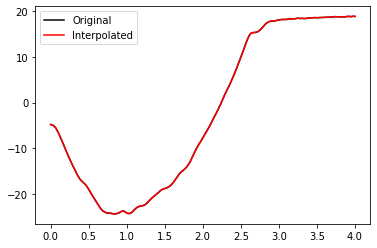

In [99]:
# Plot both
plt.plot(pmf_mehp[0], pmf_mehph[1], label = 'Original', color = 'k')
plt.plot(pmf_mehp[0], mehph, label = 'Interpolated', color = 'r')
plt.legend()
# So they coincide, not a difference at all

#### Now, for the weighted average of the diffusion coefficient, we need to make a dataframe where we make a separate columns for distance, free energy of deprotonated(P), free energy of protonated(PH), Diffusion coefficient for deprotonated, Diffusion coefficient for protonated, and finally the the partition function (Q(z)) according to the relation $$D(z) = D(z)_P\frac{e^{\frac{-\Delta G(z)_P}{RT}}}{Q(z)} + D(z)_{PH}\frac{e^{\frac{-\Delta G(z)_{PH}}{RT}}}{Q(z)}$$
where, $Q(z)$ is the sum of two states given by, $$Q(z) = e^{\frac{-\Delta G(z)_P}{RT}} + e^{\frac{-\Delta G(z)_{PH}}{RT}}$$

In [100]:
df_diffusion = pd.DataFrame({'z':pmf_mehp[0], 'G_P': pmf_mehp[1], 'G_PH': mehph, 'D_P': diff_mehp_inter, 'D_PH': diff_mehph_inter}) 

In [101]:
df_diffusion

,z,G_P,G_PH,D_P,D_PH
0,0.000000,24.183470,-4.781290,1.247037e-07,3.175044e-09
1,0.005005,24.183470,-4.781290,1.360629e-07,5.657692e-09
2,0.015014,24.057350,-4.816531,1.587814e-07,1.062299e-08
3,0.025024,23.776710,-4.848687,1.815000e-07,1.558829e-08
4,0.035033,23.349420,-4.974817,2.042185e-07,2.055358e-08
...,...,...,...,...,...
397,3.968730,0.081822,18.812326,9.620619e-06,8.401825e-06
398,3.978739,0.071655,18.842648,9.526819e-06,8.541859e-06
399,3.988748,0.067265,18.810865,9.433019e-06,8.681892e-06
400,3.998758,0.076853,18.806956,9.339210e-06,8.821940e-06


In [103]:
#Adding a column for Q 
df_diffusion['Q'] = np.exp(-df_diffusion["G_P"]/2.478) + np.exp(-df_diffusion["G_PH"]/2.478)

In [104]:
df_diffusion

,z,G_P,G_PH,D_P,D_PH,Q
0,0.000000,24.183470,-4.781290,1.247037e-07,3.175044e-09,6.886094
1,0.005005,24.183470,-4.781290,1.360629e-07,5.657692e-09,6.886094
2,0.015014,24.057350,-4.816531,1.587814e-07,1.062299e-08,6.984727
3,0.025024,23.776710,-4.848687,1.815000e-07,1.558829e-08,7.075960
4,0.035033,23.349420,-4.974817,2.042185e-07,2.055358e-08,7.445459
...,...,...,...,...,...,...
397,3.968730,0.081822,18.812326,9.620619e-06,8.401825e-06,0.968024
398,3.978739,0.071655,18.842648,9.526819e-06,8.541859e-06,0.971996
399,3.988748,0.067265,18.810865,9.433019e-06,8.681892e-06,0.973725
400,3.998758,0.076853,18.806956,9.339210e-06,8.821940e-06,0.969967


In [105]:
# Adding a column for Diffusion coefficient
df_diffusion['D'] = df_diffusion['D_P'] * (np.exp(-df_diffusion["G_P"]/2.478)/df_diffusion['Q']) + df_diffusion['D_PH'] * (np.exp(-df_diffusion["G_PH"]/2.478)/df_diffusion['Q'])

In [106]:
df_diffusion

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000,24.183470,-4.781290,1.247037e-07,3.175044e-09,6.886094,3.176063e-09
1,0.005005,24.183470,-4.781290,1.360629e-07,5.657692e-09,6.886094,5.658786e-09
2,0.015014,24.057350,-4.816531,1.587814e-07,1.062299e-08,6.984727,1.062428e-08
3,0.025024,23.776710,-4.848687,1.815000e-07,1.558829e-08,7.075960,1.558988e-08
4,0.035033,23.349420,-4.974817,2.042185e-07,2.055358e-08,7.445459,2.055558e-08
...,...,...,...,...,...,...,...
397,3.968730,0.081822,18.812326,9.620619e-06,8.401825e-06,0.968024,9.619983e-06
398,3.978739,0.071655,18.842648,9.526819e-06,8.541859e-06,0.971996,9.526314e-06
399,3.988748,0.067265,18.810865,9.433019e-06,8.681892e-06,0.973725,9.432630e-06
400,3.998758,0.076853,18.806956,9.339210e-06,8.821940e-06,0.969967,9.338941e-06


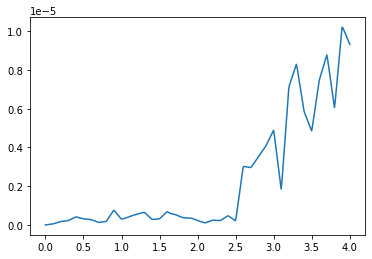

In [107]:
# Plot of weighted average of diffusion coefficient
plt.plot(df_diffusion['z'], df_diffusion['D'])

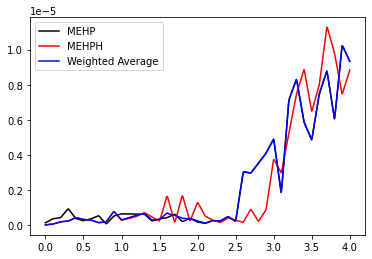

In [109]:
# For checking how identical the plots for diffusion coefficients are -
plt.plot(df_diffusion['z'], df_diffusion['D_P'],label = 'MEHP', color = 'k')
plt.plot(df_diffusion['z'], df_diffusion['D_PH'], label = 'MEHPH',  color = 'r')
plt.plot(df_diffusion['z'], df_diffusion['D'], label = 'Weighted Average', color='b')
plt.legend()
# Here the weighted average is almost identical to MEHP

##### My first approach for the numerical integration will be to convert the distance in z which are in nm into cm for both weighted pmf as well as weighted diffusion coefficient.

In [110]:
# For pmf_dep it will be ---
pmf_mehp_mehph[0] = pmf_mehp_mehph[0] * 1 * 10 ** -7
pmf_mehp_mehph.head()
# Here, the only columns we need to worry about is at the index 0 and 2 which are the values for z-distance in cm,
# exp(Delta G/RT)

,0,1,2
0,0.000000e+00,-4.781046,0.145236
1,5.004703e-10,-4.781046,0.145236
2,1.501411e-09,-4.816288,0.143185
3,2.502352e-09,-4.848423,0.141340
4,3.503292e-09,-4.974581,0.134324


In [111]:
pmf_mehp_mehph.tail()

,0,1,2
397,3.968730e-07,0.091611,1.037662
398,3.978739e-07,0.081302,1.033354
399,3.988748e-07,0.077020,1.031570
400,3.998758e-07,0.086647,1.035585
401,4.000000e-07,0.086647,1.035585


In [112]:
np.exp(0.086647/2.478) #just checking values again

1.0355850215533353

In [113]:
df_diffusion['z'] = df_diffusion['z'] * 1 * 10 ** -7
df_diffusion.head()

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000e+00,24.18347,-4.781290,1.247037e-07,3.175044e-09,6.886094,3.176063e-09
1,5.004703e-10,24.18347,-4.781290,1.360629e-07,5.657692e-09,6.886094,5.658786e-09
2,1.501411e-09,24.05735,-4.816531,1.587814e-07,1.062299e-08,6.984727,1.062428e-08
3,2.502352e-09,23.77671,-4.848687,1.815000e-07,1.558829e-08,7.075960,1.558988e-08
4,3.503292e-09,23.34942,-4.974817,2.042185e-07,2.055358e-08,7.445459,2.055558e-08


In [114]:
pmf_mehp_mehph

,0,1,2
0,0.000000e+00,-4.781046,0.145236
1,5.004703e-10,-4.781046,0.145236
2,1.501411e-09,-4.816288,0.143185
3,2.502352e-09,-4.848423,0.141340
4,3.503292e-09,-4.974581,0.134324
...,...,...,...
397,3.968730e-07,0.091611,1.037662
398,3.978739e-07,0.081302,1.033354
399,3.988748e-07,0.077020,1.031570
400,3.998758e-07,0.086647,1.035585


In [115]:
df_diffusion.tail()

,z,G_P,G_PH,D_P,D_PH,Q,D
397,3.968730e-07,0.081822,18.812326,0.000010,0.000008,0.968024,0.000010
398,3.978739e-07,0.071655,18.842648,0.000010,0.000009,0.971996,0.000010
399,3.988748e-07,0.067265,18.810865,0.000009,0.000009,0.973725,0.000009
400,3.998758e-07,0.076853,18.806956,0.000009,0.000009,0.969967,0.000009
401,4.000000e-07,0.076853,18.806849,0.000009,0.000009,0.969968,0.000009


<AxesSubplot:xlabel='z'>

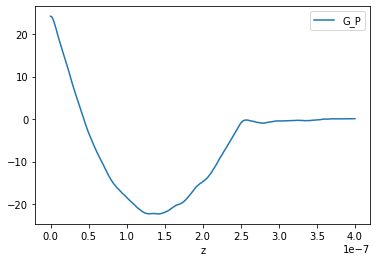

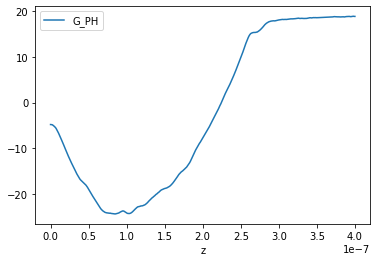

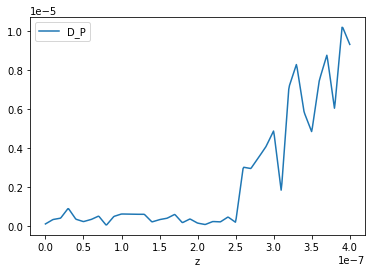

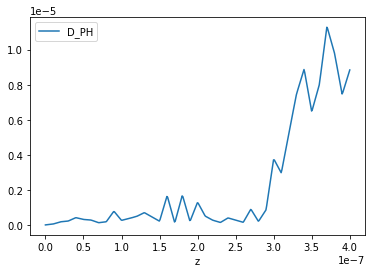

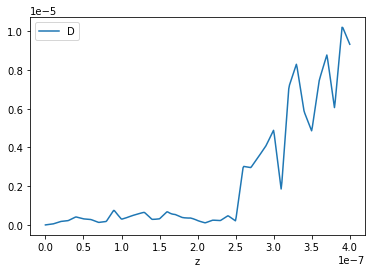

In [116]:
# Play with plots
df_diffusion.plot('z', 'G_P')
df_diffusion.plot('z', 'G_PH')
df_diffusion.plot('z', 'D_P')
df_diffusion.plot('z', 'D_PH')
df_diffusion.plot('z', 'D')

#### Now, we can perform numerical integration with either composite trapezoidal rule, or the simpson's rule

$$\int_{0}^{4 \times 10 ^{-7}} \frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)} dz$$

In [117]:
#trapz(values of the function to integrate, sample points(z) corresponding to the function values, optional (dz)
#- spacing between the sample points(z))

In [119]:
integrand = pmf_mehp_mehph[2]/df_diffusion['D']

In [120]:
integrand

0      4.572823e+07
1      2.566553e+07
2      1.347714e+07
3      9.066132e+06
4      6.534688e+06
           ...     
397    1.078652e+05
398    1.084736e+05
399    1.093618e+05
400    1.108889e+05
401    1.110271e+05
Length: 402, dtype: float64

In [121]:
#Let's check some values of the integrand. For the first value at z = 0,

In [122]:
pmf_mehp_mehph[1].to_numpy()[0] # This is the pmf

-4.781046

In [123]:
df_diffusion['D'].to_numpy()[0]

3.1760628157003235e-09

In [124]:
#Delta G = -4.781046, RT = 2.478, D(z) = 3.1760628157003235e-09 cm^2/s
np.exp(-4.781046/2.478)/3.1760628157003235e-09

45728231.44696842

In [125]:
integrand[0]

45728231.44696842

In [126]:
trapz(integrand, df_diffusion['z']) # or

0.13469915560222745

In [127]:
trapz(integrand, pmf_mehp_mehph[0])

0.13469915560222745

In [128]:
# The permeability will be 1/integral
1/trapz(integrand, pmf_mehp_mehph[0]) # in cm/s

7.423951512755166

In [129]:
1/0.1346991556022274

7.42395151275517

The calculated value of permeability for monoester(MEHP-MEHPH) is $$7.424\;cm/s$$

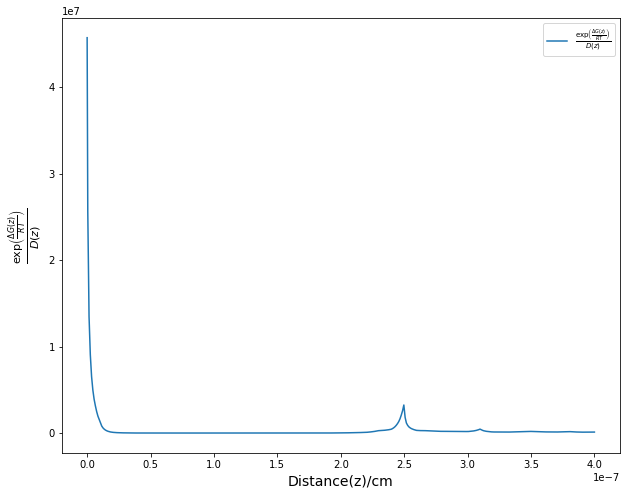

In [130]:
# Let's look at the plot of the integrand
plt.figure(figsize = (10,8))
plt.plot(pmf_mehp_mehph[0], integrand, label = r'$\frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)}$')
plt.xlabel('Distance(z)/cm', fontsize = 14)
plt.ylabel(r'$\frac{\exp\left ( \frac{\Delta G(z)}{RT} \right )}{D(z)}$', fontsize = 16)
plt.legend()

#### Using Simpson's method

In [132]:
1/simps(integrand, pmf_mehp_mehph[0]) # Identical result, not much of a difference

7.5795071230735855

In [134]:
integ = pd.DataFrame({'0': pmf_mehp_mehph[0], '1': integrand})

In [135]:
integ

,0,1
0,0.000000e+00,4.572823e+07
1,5.004703e-10,2.566553e+07
2,1.501411e-09,1.347714e+07
3,2.502352e-09,9.066132e+06
4,3.503292e-09,6.534688e+06
...,...,...
397,3.968730e-07,1.078652e+05
398,3.978739e-07,1.084736e+05
399,3.988748e-07,1.093618e+05
400,3.998758e-07,1.108889e+05


In [137]:
# You can also export the data to xmgrace and calculate the area by yourself
integ.to_csv('integrand_mehph.xvg', index = False, header = None, sep = ' ')

In [138]:
!xmgrace integrand_mehph.xvg  # Gives us the same area as the value of our integral

#### My another approach for the numerical integration will be to convert diffusion coefficient (cm^2/s) into nm^2/s, integrate it over the distance in nm, and finally convert into cm/s

In [139]:
pmf_mehp_mehph.head()

,0,1,2
0,0.000000e+00,-4.781046,0.145236
1,5.004703e-10,-4.781046,0.145236
2,1.501411e-09,-4.816288,0.143185
3,2.502352e-09,-4.848423,0.141340
4,3.503292e-09,-4.974581,0.134324


In [140]:
df_diffusion.head()

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000e+00,24.18347,-4.781290,1.247037e-07,3.175044e-09,6.886094,3.176063e-09
1,5.004703e-10,24.18347,-4.781290,1.360629e-07,5.657692e-09,6.886094,5.658786e-09
2,1.501411e-09,24.05735,-4.816531,1.587814e-07,1.062299e-08,6.984727,1.062428e-08
3,2.502352e-09,23.77671,-4.848687,1.815000e-07,1.558829e-08,7.075960,1.558988e-08
4,3.503292e-09,23.34942,-4.974817,2.042185e-07,2.055358e-08,7.445459,2.055558e-08


In [141]:
pmf_mehp_mehph[0] = pmf_mehp_mehph[0] * 1 * 10 ** 7
df_diffusion['z'] = df_diffusion['z'] * 1 * 10 ** 7

In [142]:
pmf_mehp_mehph.head()

,0,1,2
0,0.000000,-4.781046,0.145236
1,0.005005,-4.781046,0.145236
2,0.015014,-4.816288,0.143185
3,0.025024,-4.848423,0.141340
4,0.035033,-4.974581,0.134324


In [143]:
df_diffusion.head()

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000,24.18347,-4.781290,1.247037e-07,3.175044e-09,6.886094,3.176063e-09
1,0.005005,24.18347,-4.781290,1.360629e-07,5.657692e-09,6.886094,5.658786e-09
2,0.015014,24.05735,-4.816531,1.587814e-07,1.062299e-08,6.984727,1.062428e-08
3,0.025024,23.77671,-4.848687,1.815000e-07,1.558829e-08,7.075960,1.558988e-08
4,0.035033,23.34942,-4.974817,2.042185e-07,2.055358e-08,7.445459,2.055558e-08


In [144]:
# Converting diffusion coefficient into nm^2/s and adding it into the last column
df_diffusion['D'] = df_diffusion['D'] * 1 * 10 ** 14

In [145]:
df_diffusion.head()

,z,G_P,G_PH,D_P,D_PH,Q,D
0,0.000000,24.18347,-4.781290,1.247037e-07,3.175044e-09,6.886094,3.176063e+05
1,0.005005,24.18347,-4.781290,1.360629e-07,5.657692e-09,6.886094,5.658786e+05
2,0.015014,24.05735,-4.816531,1.587814e-07,1.062299e-08,6.984727,1.062428e+06
3,0.025024,23.77671,-4.848687,1.815000e-07,1.558829e-08,7.075960,1.558988e+06
4,0.035033,23.34942,-4.974817,2.042185e-07,2.055358e-08,7.445459,2.055558e+06


In [146]:
integrand = pmf_mehp_mehph[2]/df_diffusion['D']

In [147]:
trapz(integrand, pmf_mehp_mehph[0])

1.3469915560222746e-08

In [149]:
1/trapz(integrand, pmf_mehp_mehph[0]) # This is now in nm/s

74239515.12755166

In [150]:
# Converting into cm/s
1/trapz(integrand, pmf_mehp_mehph[0]) * 1 * 10 ** -7 # We got the same answer in both ways

7.423951512755166